In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import math

### 1.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated. 

In [151]:
def angle_between (v1,v2):        #Can be extended of n dim
    cos_angle=(np.dot(v1,v2))/(linalg.norm(v1)*linalg.norm(v2))
    theta_rad=math.acos(cos_angle)
    print("Angle between 2 vectors in radians:",theta_rad)
    print("Angle between 2 vectors in degrees:",math.degrees(theta_rad))
    return     

In [152]:
angle_between([10,9,3],[2,5,12])

Angle between 2 vectors in radians: 0.979924710443726
Angle between 2 vectors in degrees: 56.14555014900476


### Another Way

In [148]:
def angle_between (v1,v2):        #Can be extended of n dim
    cos_angle=(np.dot(v1,v2))/(linalg.norm(v1)*linalg.norm(v2))
    theta=np.arccos(cos_angle)
    print("Angle between 2 vectors in radians:",theta)
    return

In [149]:
angle_between([10,9,3],[2,5,12])

Angle between 2 vectors in radians: 0.979924710443726


### 2.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).

In [105]:
def row_dot (A):
    r1=A[0]
    r2=A[1]
    print(np.dot(A[0],A[1]))

In [106]:
row_dot([[3,5,6],[8,2,4]])

58


#### Alternatively,

In [107]:
def row_dot1 (A,r1,r2):
    print(np.dot(A[0],A[1]))

In [108]:
r1=([3,5,6])
r2=([8,2,4])
A=np.array([r1,r2])
row_dot1(A,r1,r2)

58


### 3.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?

#### Matrix divide a numpy function uses true division operator ( / ) to perform elemental wise calculations.

In [109]:
def matrix_divison(m1,m2):
    print(m1)
    print(m2)
    mat_div=np.divide(m1,m2)
    return mat_div

In [110]:
matrix_divison([[1,0,0],[0,0,4],[0,1,0]],[[2,1,4],[5,7,1],[1,2,5]])

[[1, 0, 0], [0, 0, 4], [0, 1, 0]]
[[2, 1, 4], [5, 7, 1], [1, 2, 5]]


array([[0.5, 0. , 0. ],
       [0. , 0. , 4. ],
       [0. , 0.5, 0. ]])

#### Division of two matrices, Matrix division is not possible because as one matrix divided by the second matrix is undefined. Matrix multiplication of matrices AB is not commutative. Meaning AB not equal to BA. Hence  A.(transpose of B) is used. This can only be done with square matrices.

In [111]:
def matrix_divison(m1,m2):
    m2T=np.transpose(m2)
    print(m1)
    print(m2T)
    mat_div=np.dot(m1,m2T)
    return mat_div

In [112]:
matrix_divison([[1,0,0],[0,0,4],[0,1,0]],[[2,1,4],[5,7,1],[1,2,5]])

[[1, 0, 0], [0, 0, 4], [0, 1, 0]]
[[2 5 1]
 [1 7 2]
 [4 1 5]]


array([[ 2,  5,  1],
       [16,  4, 20],
       [ 1,  7,  2]])

### 4.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is  , |π/2−θ|<tol|π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.
# Test cases for problem 4
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
is_orthogonal(a,b, 0.01)

# output: 0
is_orthogonal(a,b, 0.001)

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)


In [113]:
def is_orthogonal (v1,v2,tol):
    v1T=np.transpose(v1)
    cos_angle=(np.dot(v1T,v2))/(linalg.norm(v1T)*linalg.norm(v2))
    theta_rad=math.acos(cos_angle)
    if -tol< ((math.pi)/2-theta_rad) < tol:
        print ("output:",1)
    else:
        print ("output:",0)
    return(theta_rad)

### Test Case 1

In [114]:
v1 = np.array([[1], [0.001]])
v2 = np.array([[0.001], [1]])
# output: 1
is_orthogonal(v1,v2, 0.01)

output: 1


1.5687963274615628

### Test Case 2

In [118]:
v1 = np.array([[1], [0.001]])
v2 = np.array([[0.001], [1]])
# output: 0
is_orthogonal(v1,v2, 0.001)


output: 0


1.5687963274615628

### Test Case 3

In [119]:
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)

output: 0


0.7843981637307818

### Test Case 4

In [120]:
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)

output: 1


1.5707963267948966

### 5.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4. 

In [132]:
class vector_calculator:
    def __init__ (self,v1,v2):
        self.v1=v1
        self.v2=v2
    
    @staticmethod
    def is_orthogonal (v1,v2,tol):
        v1T=np.transpose(v1)
        cos_angle=(np.dot(v1T,v2))/(linalg.norm(v1T)*linalg.norm(v2))
        theta_rad=math.acos(cos_angle)
        if -tol< ((math.pi)/2-theta_rad) < tol:
            print ("output:",1)
        else:
            print ("output:",0)
        return(theta_rad)
        
    @staticmethod
    def angle_between (v1,v2):
        cos_angle=(np.dot(v1,v2))/(linalg.norm(v1)*linalg.norm(v2))
        theta_rad=math.acos(cos_angle)
        print("Angle between 2 vectors in radians:",theta_rad)
        print("Angle between 2 vectors in degrees:",math.degrees(theta_rad))
        return  

In [133]:
result= vector_calculator([10,9,3],[2,5,12])
print(result.v1)
print(result.v2)

[10, 9, 3]
[2, 5, 12]


In [154]:
result.is_orthogonal([[1], [0.001]],[[0.001], [1]],0.01)

output: 1


1.5687963274615628

In [155]:
result.angle_between([10,9,3],[2,5,12])

Angle between 2 vectors in radians: 0.979924710443726
Angle between 2 vectors in degrees: 56.14555014900476


#### 6.6.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

#### PCA is a dimentionality reduction technique that helps in extracting information from higher dimensional space to lower dimensional space. This technique drops unnecessary data or data that has less variance on the results and uses the data that has higher variance. 

#### Importing data from the sklearn

In [192]:
from sklearn.datasets import load_breast_cancer

In [259]:
breast=load_breast_cancer()
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Understading the data and transforming it to dataframe

In [260]:
breast_data=breast.data
breast_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [261]:
breast_labels=breast.target
breast_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [262]:
breast_data.shape

(569, 30)

In [263]:
breast_labels.shape

(569,)

In [264]:
la=np.reshape(breast_labels,(569,1))

In [265]:
data=np.concatenate([breast_data,la],axis=1)

In [266]:
data.shape

(569, 31)

In [267]:
breast_dataset=pd.DataFrame(data)

In [268]:
breast_dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [269]:
breast_dataset.index

RangeIndex(start=0, stop=569, step=1)

In [270]:
breast_dataset.columns

RangeIndex(start=0, stop=31, step=1)

In [271]:
features=breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [272]:
features_labels=np.append(features,'labels')
features_labels

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'labels'],
      dtype='<U23')

In [294]:
breast_dataset.columns=features_labels

In [295]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [296]:
breast_dataset['labels'].replace([0,1],['Benign','Malignant'],inplace=True)

In [297]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


#### Check for nulls

In [298]:
breast_dataset.isnull().sum()    #None found

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
labels                     0
dtype: int64

### PCA Analysis:

#### As an initial step we need to normalised data. Which means data will  be converted to a mean of 0 and standard deviation of 1.

In [300]:
# Gathering the required numerical values
x = breast_dataset.loc[:, features].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [301]:
# normalizing the features
x = StandardScaler().fit_transform(x) 
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [302]:
# Shape of data after normalising
x.shape  

(569, 30)

In [304]:
#Check for mean and std after normalising data
print (x.std())
print(x.mean())       

1.0
-6.826538293184326e-17


In [307]:
# Creating column names for the data
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [308]:
#Creating dataframe for the normalised data
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


#### Applying PCA on to the dataframe

#### Initially converting cancer data from 30 dimensioins to a 3 dimensional data for easier visiualization.

In [318]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)

In [320]:
#Creating dataframe for 3 principal component
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [321]:
principal_breast_Df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439316,-3.576817,2.459479
565,3.793382,-3.584048,2.088485
566,1.256179,-1.902297,0.562731
567,10.374794,1.672011,-1.877059
568,-5.475243,-0.670635,1.490398


In [322]:
#Calculating variance ratio for principal components
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


#### Variance ratio highlights the fact that the principal component 1 gives 44.2% of the information. Where as principal component 2 contibutes to the 18.9% of the information. Also for principal component 3 it contributes 9%.Overall it tells that 71.1% information can be known. 28.9% of the information is lost as noice.

#### PCA visualization:

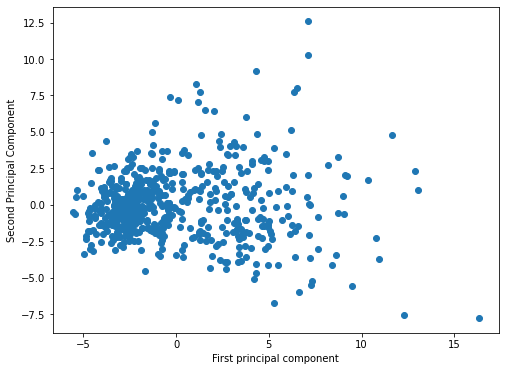

In [316]:
# visualization for principal component 1 and principal component 2:
plt.figure(figsize=(8,6))
plt.scatter(principal_breast_Df['principal component 1'],principal_breast_Df['principal component 2'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

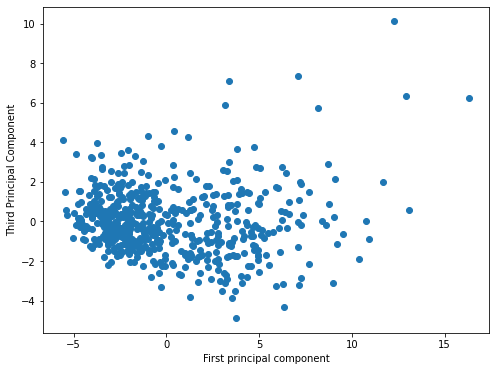

In [328]:
# visualization for principal component 1 and principal component 3:
plt.figure(figsize=(8,6))
plt.scatter(principal_breast_Df['principal component 1'],principal_breast_Df['principal component 3'])
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')
plt.show()

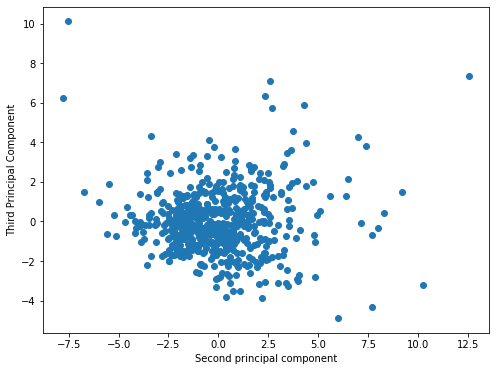

In [329]:
# visualization for principal component 3 and principal component 2:
plt.figure(figsize=(8,6))
plt.scatter(principal_breast_Df['principal component 2'],principal_breast_Df['principal component 3'])
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.show()

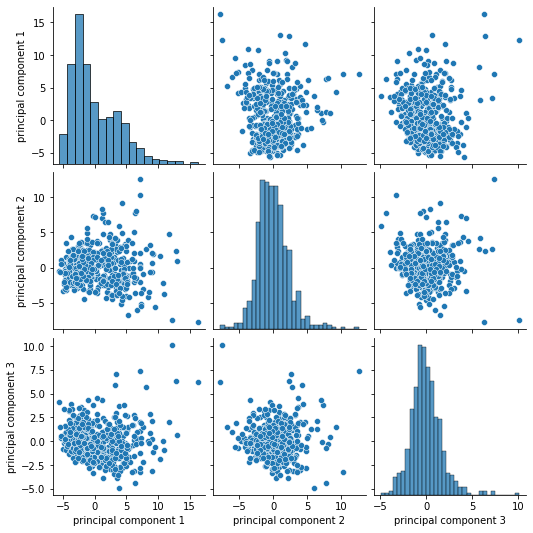

In [327]:
sns.pairplot(pd.DataFrame(principal_breast_Df))

#### In order to get 95% of information of the data how many principle components are requred? To answer this:

In [330]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=30)
principalComponents_breast = pca_breast.fit_transform(x)

In [331]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast)

In [332]:
print(pca_breast.explained_variance_ratio_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


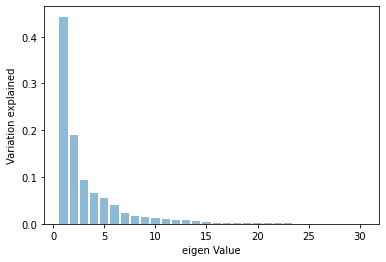

In [333]:
plt.bar(list(range(1,31)),pca_breast.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

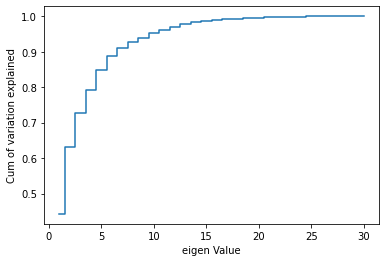

In [334]:
plt.step(list(range(1,31)),np.cumsum(pca_breast.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Therefore, from the graph to get 95% information from the information we have to use  7 principle components.